In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-codes/NLP_CT3_news_data.csv


In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer ##stemming purpose
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics
from keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import SimpleRNN
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv("/kaggle/input/nlp-codes/NLP_CT3_news_data.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
###Drop Nan Values
data=data.dropna()

In [8]:
X=data.drop('label',axis=1)

In [9]:
y=data['label']

In [10]:
X.shape,y.shape

((18285, 4), (18285,))

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
### Vocabulary size
voc_size=5000

In [13]:
messages=X.copy()

In [14]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [18]:
messages.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [19]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [21]:
cv = CountVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()

In [23]:
sent_length=100
embedded_docs=pad_sequences(X,padding='post',maxlen=sent_length)

In [24]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X_final,y_final, test_size=0.25, random_state=42)

In [26]:
review_classify_model = MultinomialNB().fit(X_train, y_train)

Training performance
Training accuracy score 0.658
              precision    recall  f1-score   support

           0       0.64      0.90      0.75      7761
           1       0.72      0.34      0.46      5952

    accuracy                           0.66     13713
   macro avg       0.68      0.62      0.61     13713
weighted avg       0.68      0.66      0.62     13713

confusion_matrix [[6989  772]
 [3922 2030]]


<AxesSubplot:>

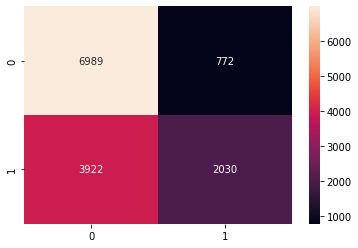

In [27]:
# training data performance metrics
ypred_train=review_classify_model.predict(X_train)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train,ypred_train))
print(classification_report(y_train,ypred_train))
print('confusion_matrix',confusion_matrix(y_train,ypred_train))
sns.heatmap(confusion_matrix(y_train,ypred_train),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.648
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      2600
           1       0.70      0.33      0.45      1972

    accuracy                           0.65      4572
   macro avg       0.67      0.61      0.59      4572
weighted avg       0.66      0.65      0.61      4572

confusion_matrix [[2317  283]
 [1326  646]]


<AxesSubplot:>

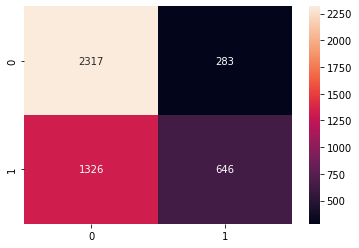

In [28]:
# testing accuarcy

ypred_test=review_classify_model.predict(X_test)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test,ypred_test))
print(classification_report(y_test,ypred_test))
print('confusion_matrix',confusion_matrix(y_test,ypred_test))
sns.heatmap(confusion_matrix(y_test,ypred_test),annot=True,fmt=".4g")



In [29]:
rf=RandomForestClassifier(n_estimators=50,random_state=40)
rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50, random_state=40)

Training performance
Training accuracy score 0.792
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      7761
           1       0.68      0.97      0.80      5952

    accuracy                           0.79     13713
   macro avg       0.82      0.81      0.79     13713
weighted avg       0.84      0.79      0.79     13713

confusion_matrix [[5103 2658]
 [ 188 5764]]


<AxesSubplot:>

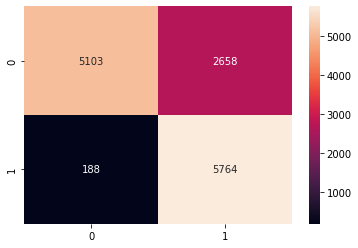

In [30]:
# training data performance metrics
ypred_train=rf.predict(X_train)
print("Training performance")
print("Training accuracy score %.3f" % accuracy_score(y_train,ypred_train))
print(classification_report(y_train,ypred_train))
print('confusion_matrix',confusion_matrix(y_train,ypred_train))
sns.heatmap(confusion_matrix(y_train,ypred_train),annot=True,fmt=".4g")

Testing performance
Testing accuracy score 0.772
              precision    recall  f1-score   support

           0       0.96      0.63      0.76      2600
           1       0.66      0.96      0.78      1972

    accuracy                           0.77      4572
   macro avg       0.81      0.80      0.77      4572
weighted avg       0.83      0.77      0.77      4572

confusion_matrix [[1636  964]
 [  77 1895]]


<AxesSubplot:>

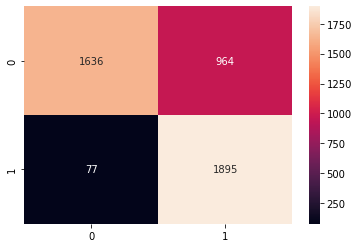

In [31]:
#testing accuarcy

ypred_test=rf.predict(X_test)

print("Testing performance")
print("Testing accuracy score %.3f" % accuracy_score(y_test,ypred_test))
print(classification_report(y_test,ypred_test))
print('confusion_matrix',confusion_matrix(y_test,ypred_test))
sns.heatmap(confusion_matrix(y_test,ypred_test),annot=True,fmt=".4g")



In [32]:
#Designing LSTM Model 
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-01-21 14:52:39.337256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 14:52:39.338346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 14:52:39.460022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 14:52:39.460876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 14:52:39.461633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 40)           200000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 40)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,batch_size=64)

2023-01-21 14:53:34.369717: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4


2023-01-21 14:53:37.351322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


215/215 [==============================] - 9s 16ms/step - loss: 0.5468 - accuracy: 0.6802 - val_loss: 0.4527 - val_accuracy: 0.7609
Epoch 2/4
215/215 [==============================] - 2s 11ms/step - loss: 0.4500 - accuracy: 0.7680 - val_loss: 0.4561 - val_accuracy: 0.7625
Epoch 3/4
215/215 [==============================] - 2s 11ms/step - loss: 0.4460 - accuracy: 0.7702 - val_loss: 0.4477 - val_accuracy: 0.7631
Epoch 4/4
215/215 [==============================] - 2s 11ms/step - loss: 0.4438 - accuracy: 0.7712 - val_loss: 0.4442 - val_accuracy: 0.7653


In [36]:
y_pred=model.predict(X_test)
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve
confusion_matrix(y_test,y_pred)

array([[1583, 1017],
       [  73, 1899]])

In [37]:
accuracy_score(y_test,y_pred)

0.7615923009623797

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.74      2600
           1       0.65      0.96      0.78      1972

    accuracy                           0.76      4572
   macro avg       0.80      0.79      0.76      4572
weighted avg       0.82      0.76      0.76      4572



In [40]:
#Simple RNN with two layers

## Creating model
embedding_vector_features=40
model_RNN=Sequential()
model_RNN.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_RNN.add(Dropout(0.3))
model_RNN.add(SimpleRNN(100, return_sequences=True))
model_RNN.add(SimpleRNN(100))
model_RNN.add(Dropout(0.3))
model_RNN.add(Dense(1,activation='sigmoid'))
model_RNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
#Bi-Directional LSTM
model_bi=Sequential()
model_bi.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_bi.add(Dropout(0.3))
model_bi.add(Bidirectional(LSTM(100)))
model_bi.add(Dropout(0.3))
model_bi.add(Dense(1,activation='sigmoid'))
model_bi.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model_bi.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,batch_size=64)

Epoch 1/4
215/215 [==============================] - 8s 23ms/step - loss: 0.5313 - accuracy: 0.7056 - val_loss: 0.4501 - val_accuracy: 0.7620
Epoch 2/4
215/215 [==============================] - 4s 18ms/step - loss: 0.4481 - accuracy: 0.7689 - val_loss: 0.4450 - val_accuracy: 0.7647
Epoch 3/4
215/215 [==============================] - 4s 19ms/step - loss: 0.4442 - accuracy: 0.7699 - val_loss: 0.4440 - val_accuracy: 0.7644
Epoch 4/4
215/215 [==============================] - 4s 18ms/step - loss: 0.4406 - accuracy: 0.7712 - val_loss: 0.4422 - val_accuracy: 0.7647


In [43]:
y_pred_bi=model_bi.predict(X_test)
y_pred_bi=np.where(y_pred_bi > 0.6, 1,0) ##AUC ROC Curve
confusion_matrix(y_test,y_pred_bi)

array([[1637,  963],
       [ 185, 1787]])

In [44]:
print("BI Accuracy")
accuracy_score(y_test,y_pred_bi)

BI Accuracy


0.7489063867016623

In [45]:
print(classification_report(y_test,y_pred_bi))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      2600
           1       0.65      0.91      0.76      1972

    accuracy                           0.75      4572
   macro avg       0.77      0.77      0.75      4572
weighted avg       0.79      0.75      0.75      4572



In [46]:
model_RNN.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=64)

Epoch 1/3
215/215 [==============================] - 49s 219ms/step - loss: 0.4696 - accuracy: 0.7397 - val_loss: 0.4374 - val_accuracy: 0.7644
Epoch 2/3
215/215 [==============================] - 46s 214ms/step - loss: 0.4455 - accuracy: 0.7621 - val_loss: 0.4390 - val_accuracy: 0.7668
Epoch 3/3
215/215 [==============================] - 48s 226ms/step - loss: 0.4362 - accuracy: 0.7669 - val_loss: 0.4400 - val_accuracy: 0.7671


In [47]:
y_pred_RNN=model_RNN.predict(X_test)
y_pred_RNN=np.where(y_pred_RNN > 0.6, 1,0) ##AUC ROC Curve
confusion_matrix(y_test,y_pred_RNN)

array([[1546, 1054],
       [  11, 1961]])

In [48]:
print("RNN Accuracy")
accuracy_score(y_test,y_pred_RNN)

RNN Accuracy


0.7670603674540682

In [49]:
print(classification_report(y_test,y_pred_RNN))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2600
           1       0.65      0.99      0.79      1972

    accuracy                           0.77      4572
   macro avg       0.82      0.79      0.77      4572
weighted avg       0.85      0.77      0.76      4572



In [ ]:
#Label encoder
# encode the labels using LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)